In [1]:
import pandas as pd
import numpy as np
import requests
from tqdm import tqdm
tqdm.pandas()

import datetime

In [8]:
links = []
pages = []

for i in tqdm(range(1,201)):
    a = requests.get(f"https://www.ft.com/brexit?page={i}")
    f = str(a.content)
    q = f.split('<div class="o-teaser__heading"><a href="')
    q = [s.split('data-trackable="heading-link"')[0] for s in q]
    q = q[1:-1]
    for k in q:
        links.append(k)
        pages.append(i)

100%|██████████| 200/200 [01:16<00:00,  2.48it/s]


In [21]:
df = pd.DataFrame({
    'page':pages,
    "url":links
})

In [23]:
df = df.drop_duplicates("url")

In [27]:
df.url = df.url.apply(lambda x: x.split('"')[0])

In [30]:
df.to_csv("articles.csv",index=False)

In [2]:
articles = pd.read_csv("articles.csv")

articles = articles[articles.url.str.contains('/content/')]

In [2]:
import os
import pandas as pd
import numpy as np
import requests
from tqdm import tqdm
from selenium import webdriver

In [3]:
dirs = ["/content/" + d.split(".")[0] for d in dirs]

In [3]:
articles = pd.read_csv("articles.csv")

articles = articles[articles.url.str.contains('/content/')]

In [5]:
articles = articles[articles.url.isin(dirs) == False] 

In [6]:
driver = webdriver.Firefox()

In [7]:
driver.get("https://accounts.ft.com/login")

In [8]:
for v in tqdm(articles.url.values):
    driver.get(f"https://ft.com{v}")
    driver.implicitly_wait(0.1)
    with open("raw_articles/" + v.split("/")[-1] + ".html","w") as f:
        f.write(driver.page_source)

100%|██████████| 1856/1856 [1:20:54<00:00,  2.69s/it]


In [10]:
u = os.listdir("raw_articles")

In [12]:
f = u[51]

In [3]:
from bs4 import BeautifulSoup

In [14]:
with open(f"raw_articles/{f}","r") as f:
    soup = BeautifulSoup(f.read())

In [19]:
soup.find_all(name="time",attrs={"class":'article-info__timestamp o-date'})[0]['datetime']

'2020-01-21T16:00:24Z'

In [29]:
articles.url = articles.url.apply(lambda x: x.split("/")[2])

In [13]:
articles = pd.read_csv("articles2.csv")


In [4]:
def get_date(x):
    f = f"raw_articles/{x}.html"
    with open(f,"r") as f:
        soup = BeautifulSoup(f.read())
    try:
        return soup.find_all(name="time",attrs={"class":'article-info__timestamp o-date'})[0]['datetime']
    except:
        return np.nan

In [5]:
def get_comment_count(x):
    f = f"raw_articles/{x}.html"
    with open(f,"r") as f:
        soup = BeautifulSoup(f.read())
    try:
        return int(soup.find_all(name="a",attrs={"id":'o-comments-count'})[0].contents[0])
    except:
        return np.nan
    


In [6]:
def get_authors(x):
    f = f"raw_articles/{x}.html"
    with open(f,"r") as f:
        soup = BeautifulSoup(f.read())
    try:
        return [i.contents[0] for i in soup.find_all(name="a",attrs={"class":'n-content-tag--author'})]
    except:
        return np.nan





In [7]:
def get_content(x):
    f = f"raw_articles/{x}.html"
    with open(f,"r") as f:
        soup = BeautifulSoup(f.read())
    try:
        q = soup.find_all(name="div",attrs={"class":'article__content-body'})[0]
        return " \n ".join([p.contents[0] for p in  q.find_all("p")])
    except:
        return np.nan



In [8]:
def get_title(x):
    f = f"raw_articles/{x}.html"
    with open(f,"r") as f:
        soup = BeautifulSoup(f.read())
    try:
        q = soup.find_all(name="h1")[0].find_all(name="span")[0].contents[0]
        return q
    except:
        return np.nan



In [9]:
def clean_article(x):
    return x.replace('class="cookie-banner variant-cookieConsentC"','class="cookie-banner variant-cookieConsentC" hidden')

In [10]:
def clean_title(x):
    return x.replace("/","-").replace("\\","-")
    

In [11]:
def save_article(x):
    try:
        f = f"raw_articles/{x.url}.html"
        with open(f,"r") as f:
            f = f.read()
        u = pd.to_datetime(x.reference_time)
        q = clean_article(f)
        name = "-".join([str(u.year),str(u.month),str(u.day)]) + "  " + x.title
        name = clean_title(name)
        with open(f"articles/{name}.html","w") as f:
            f.write(q)

        return True
    except:
        return False

In [14]:
articles.columns

Index(['page', 'url', 'reference_time', 'comment_count', 'authors'], dtype='object')

In [31]:
articles["reference_time"] = articles.url.progress_apply(get_date)

100%|██████████| 4756/4756 [03:00<00:00, 23.81it/s]


In [65]:
articles["comment_count"] = articles.url.progress_apply(get_comment_count)

100%|██████████| 4756/4756 [03:34<00:00, 22.17it/s]


In [73]:
articles["authors"] = articles.url.progress_apply(get_authors)

100%|██████████| 4756/4756 [04:30<00:00, 34.55it/s]  


In [15]:
articles["content"] = articles.url.progress_apply(get_content)

100%|██████████| 4756/4756 [04:16<00:00, 19.75it/s]


In [16]:
articles["title"] = articles.url.progress_apply(get_title)

100%|██████████| 4756/4756 [04:17<00:00, 25.50it/s]  


In [17]:
articles["processed"] = articles.progress_apply(save_article,axis=1)

100%|██████████| 4756/4756 [00:05<00:00, 922.04it/s] 


In [75]:
df = articles[articles.authors.isna() == False]

In [84]:
articles.to_csv('articles2.csv',index=False)

In [85]:
pd.read_csv("articles2.csv")

,page,url,reference_time,comment_count,authors
0,1,20148324-54a2-11ea-8841-482eed0038b1,2020-02-24T00:01:04Z,91.0,['Antonia Cundy']
1,1,74e463b8-563e-11ea-abe5-8e03987b7b20,2020-02-23T18:46:33Z,340.0,"['George Parker', 'Jim Brunsden', 'Michael Peel']"
2,1,4998e368-5626-11ea-a528-dd0f971febbc,2020-02-23T11:41:03Z,426.0,['Jim Brunsden']
3,1,8e880caa-5587-11ea-abe5-8e03987b7b20,2020-02-22T15:48:34Z,62.0,[]
4,1,8a166ff6-54b3-11ea-8841-482eed0038b1,2020-02-22T00:02:43Z,NaN,['Laura Hughes']
5,1,70703996-4f32-11ea-95a0-43d18ec715f5,2020-02-21T14:54:07Z,NaN,"['Nikou Asgari', 'Antonia Cundy']"
6,1,2c8b7e12-54ae-11ea-8841-482eed0038b1,2020-02-21T14:26:34Z,NaN,['Sebastian Payne']
7,1,46339f54-5489-11ea-a1ef-da1721a0541e,2020-02-21T14:24:56Z,NaN,['Bronwen Maddox']
8,1,e77e19a6-5278-11ea-90ad-25e377c0ee1f,2020-02-21T04:00:28Z,134.0,"['Murad Ahmed', 'John Burn-Murdoch']"
9,1,74070226-53d1-11ea-8841-482eed0038b1,2020-02-20T17:02:00Z,140.0,['Frederick Studemann']


In [77]:
df.authors.apply(len).max()

6

In [ ]:
files = []
for i f in os.listdir("raw_articles"):
    

In [36]:
df = articles.dropna()

In [38]:
df.reference_time = df.reference_time.astype(np.datetime64)

/home/bnoyt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [40]:
import datetime

In [46]:
df["datenum"] = df.reference_time.apply(lambda x: pd.to_datetime(datetime.date(x.year,x.month,1)))

/home/bnoyt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
import matplotlib.pyplot as plt

/home/bnoyt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


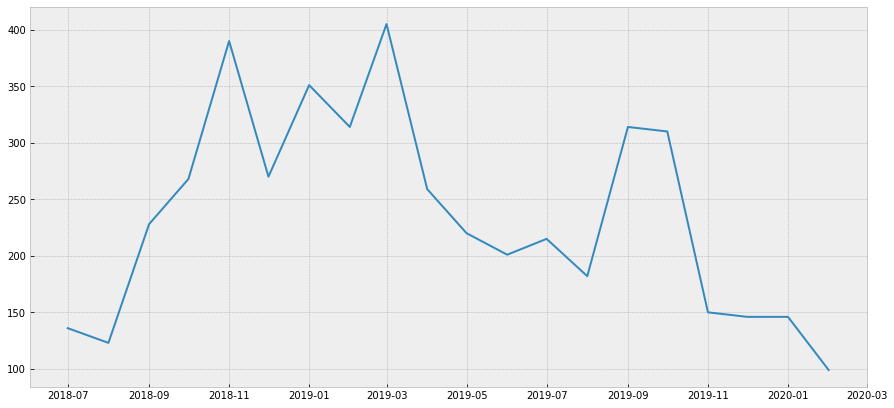

In [48]:
plt.figure(figsize=(15,7))
plt.style.use("bmh")

plt.plot(df.groupby("datenum").url.count())

In [20]:
articles.to_csv("articles3.csv")